In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [2]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

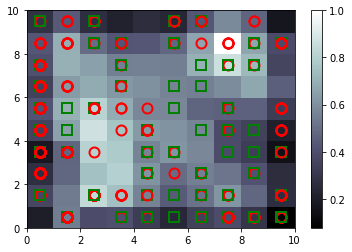

In [3]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [6]:
mappings[(8,1)]

[]

In [13]:
mappings[(6,8)]

[array([3.96746073e-01, 0.00000000e+00, 5.38345865e-02, 3.39285714e-01,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 6.14035088e-02,
        0.00000000e+00, 1.00000000e+00, 1.49253731e-01, 1.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 1.00000000e-04])]

In [14]:
# Finding the frauds
mappings = som.win_map(X)
#frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = mappings[(6,8)]
frauds = sc.inverse_transform(frauds)

In [15]:
frauds

array([[1.5664793e+07, 0.0000000e+00, 1.7330000e+01, 9.5000000e+00,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.7500000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+01, 1.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.1000000e+01]])